# Loading data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('./vente_maillots_de_bain.xlsx',sheet_name='Sheet2')
df.tail(5)

,Months,Sales
103,2009-08-01,736.6
104,2009-09-01,685.5
105,2009-10-01,635.0
106,2009-11-01,622.3
107,2009-12-01,622.3


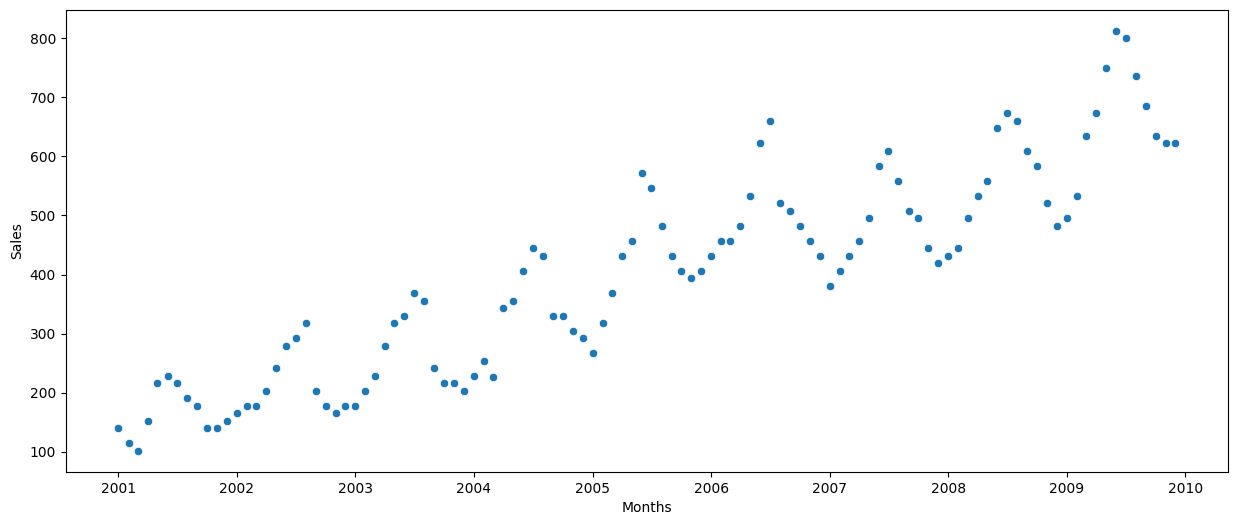

In [4]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Months", y="Sales", data=df)
plt.show()

In [9]:
df["time"] = np.arange(0, 108, 1)
# .arange permet de créer un array de taille ici 0 à 108 avec un pas de 1
# ici on créer une nouvelle colonne time
df.head()

,Months,Sales,time
0,2001-01-01,139.7,0
1,2001-02-01,114.3,1
2,2001-03-01,101.6,2
3,2001-04-01,152.4,3
4,2001-05-01,215.9,4


In [12]:
df_train = df.loc[:81]
df_test = df.loc[82:]
# .loc sert a slicer un datafram

In [1]:
x_train = df_train[["time"]].values
x_test = df_test[["time"]].values
# les double crochet permet d'extraire les colones de mon datafram

y_train = df_train[["Sales"]].values
y_test = df_test[["Sales"]].values

NameError: name 'df_train' is not defined

#Utilisation de Sklearn pour créer un modèle regressif

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
model_trend = LinearRegression()
# LinearRegression() est une fonction qui donne a et b de facon aléatoire (y= ax+b)

In [10]:
model_trend.fit(x_train, y_train)

LinearRegression()

In [11]:
y_fitted_values = model_trend.predict(x_train)
y_predicted_value = model_trend.predict(x_test)

pour calculer l'interval de confiance il faut
- calculer l'erreur
- calculer l'ecart type de l'erreur
- choisir quel interval de confiance on souhaite

In [ ]:
error = y_test - y_predicted_value # calcul de l'erreur
std_error = error.std() # calcul de l'écart type de l'erreur
interval = 4.4 * std_error

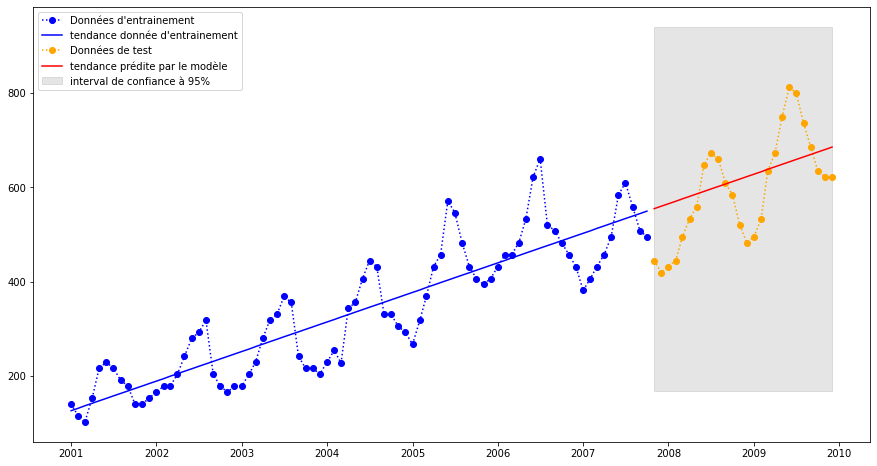

In [ ]:
plt.figure(figsize=(15, 8))
# train base
plt.plot(df_train["Years"], y_train, "bo:")
plt.plot(df_train["Years"], y_fitted_values, "b")
#test base
plt.plot(df_test["Years"], y_test, "o:", color="orange")
plt.plot(df_test["Years"], y_predicted_value, color="red")

marge_min = y_predicted_value - interval
marge_max = y_predicted_value + interval

plt.fill_between(df_test["Years"], marge_max[0], marge_min[0], alpha=0.1, color="black")
plt.legend(["Données d'entrainement", "tendance donnée d'entrainement", "Données de test", "tendance prédite par le modèle", "interval de confiance à 95%"])

# plt.show()

# Modèle additif

In [ ]:
df_train1 = df_train.copy()
df_test1 = df_test.copy()

In [ ]:
df_train1["month"] = df_train1["Years"].dt.month_name()
df_test1["month"] = df_test1["Years"].dt.month_name()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


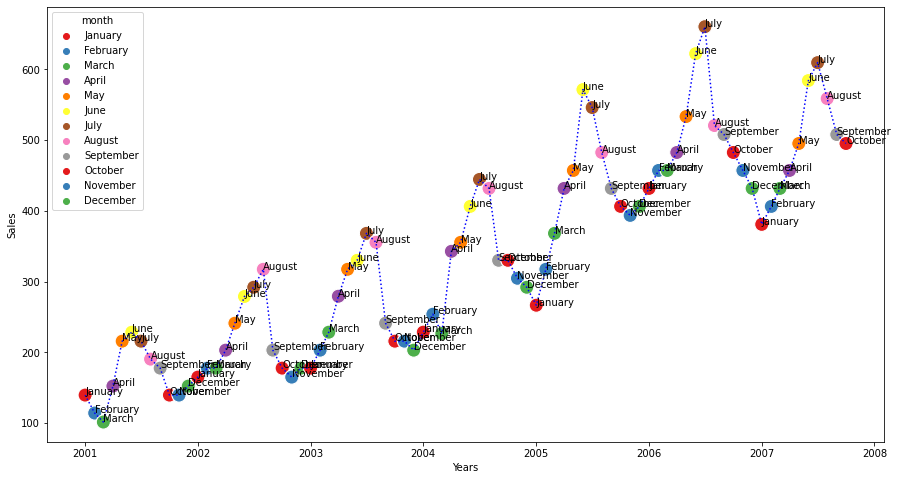

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df_train1["Years"], df_train1["Sales"], "b:")
sns.scatterplot("Years", "Sales", data=df_train1, s=200, hue="month", palette="Set1")
for index_line in range(len(df_train1)):
  plt.text(df_train1["Years"][index_line], df_train1["Sales"][index_line], df_train1["month"][index_line])

In [ ]:
dum_train = pd.get_dummies(df_train1["month"])
df_train1 = pd.concat((df_train1, dum_train), axis=1)

In [ ]:
df_train1.head(10)

,Years,Sales,time,month,April,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,0,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,February,0,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,March,0,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,April,1,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,May,0,0,0,0,0,0,0,0,1,0,0,0
5,2001-06-01,228.6,6,June,0,0,0,0,0,0,1,0,0,0,0,0
6,2001-07-01,215.9,7,July,0,0,0,0,0,1,0,0,0,0,0,0
7,2001-08-01,190.5,8,August,0,1,0,0,0,0,0,0,0,0,0,0
8,2001-09-01,177.8,9,September,0,0,0,0,0,0,0,0,0,0,0,1
9,2001-10-01,139.7,10,October,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dum_test = pd.get_dummies(df_test1["month"])
df_test1 = pd.concat((df_test1, dum_test), axis=1)

In [ ]:
columns_for_regression = ["April",	"August",	"December",	"February",	"January",	"July",	"June",	"March",	"May",	"November",	"October",	"September", "time"]
x_train_add = df_train1[columns_for_regression].values
y_train_add = df_train1["Sales"].values

x_test_add = df_test1[columns_for_regression].values
y_test_add = df_test1["Sales"].values

## Regression linéaire (modèle additif)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_add = LinearRegression()

In [ ]:
model_add.fit(x_train_add, y_train_add)

LinearRegression()

In [ ]:
y_fitted_values_add = model_add.predict(x_train_add)
y_predicted_values_add = model_add.predict(x_test_add)

In [ ]:
error_add = y_test_add - y_predicted_values_add
std_error_add = error_add.std()
interval_add = 4.4 * std_error_add

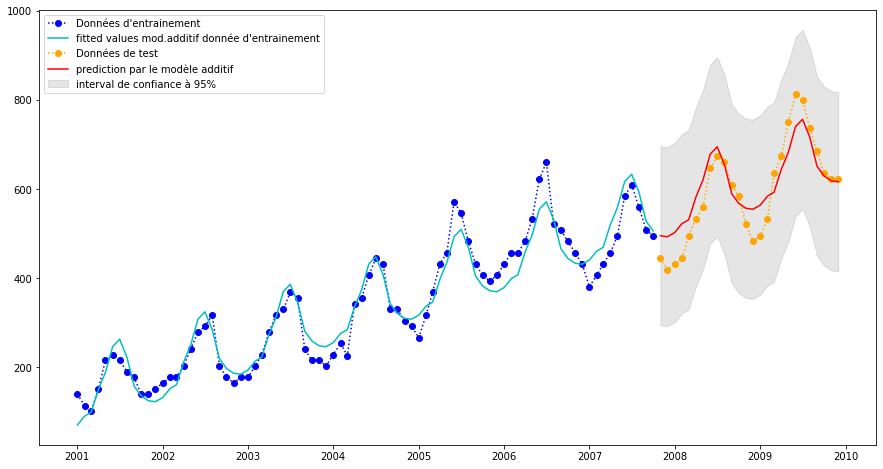

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(df_train1["Years"], y_train_add, "o:", color="blue")
plt.plot(df_train1["Years"], y_fitted_values_add, "c")

plt.plot(df_test1["Years"], y_test_add, "o:", color="orange")
plt.plot(df_test1["Years"], y_predicted_values_add, color="red")

marge_min_add = y_predicted_values_add - interval_add
marge_max_add = y_predicted_values_add + interval_add

plt.fill_between(df_test1["Years"], marge_max_add, marge_min_add, alpha=0.1, color="black")
plt.legend(["Données d'entrainement", "fitted values mod.additif donnée d'entrainement", "Données de test", "prediction par le modèle additif", "interval de confiance à 95%"], loc="upper left")

# Modèle multiplicatif

In [ ]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [ ]:
df_train2["month"] = df_train2["Years"].dt.month_name()
df_test2["month"] = df_test2["Years"].dt.month_name()

#### Etape 1 : regression linéaire simple

In [ ]:
x_train_mul = df_train2[["time"]].values
y_train_mul = df_train2[["Sales"]].values

x_test_mul = df_test2[["time"]].values
y_test_mul = df_test2[["Sales"]].values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_trend_mul = LinearRegression()

In [ ]:
model_trend_mul.fit(x_train_mul, y_train_mul)

LinearRegression()

In [ ]:
y_fitted_values_mul = model_trend_mul.predict(x_train_mul)

In [ ]:
df_train2["trend_prediction"] = y_fitted_values_mul

#### Etape 2 : calcul de la déviation saisonale

In [ ]:
df_train2["seasonal_deviation"] = df_train2["Sales"] / df_train2["trend_prediction"]

#### Etape 3 : calcul du facteur de correction

In [ ]:
correction_factor = df_train2[["month", "seasonal_deviation"]].groupby("month").mean().rename(columns={"seasonal_deviation" : "correction_factor"})

#### Etape 4 : Ajout de la colonne du facteur de correction

In [ ]:
df_train2 = df_train2.merge(correction_factor, on="month")

#### Utilisation du modèle multiplicatif

In [ ]:
df_train2["multiplicatif_model_prediction"] = df_train2["trend_prediction"] * df_train2["correction_factor"]

In [ ]:
df_test2["trend_prediction"] = model_trend_mul.predict(x_test_mul)

In [ ]:
df_test2 = df_test2.merge(correction_factor, on="month")

In [ ]:
df_test2["multiplicatif_model_prediction"] = df_test2["trend_prediction"] * df_test2["correction_factor"]

In [ ]:
df_train2.sort_values(by="Years", inplace=True, ignore_index=True)
df_test2.sort_values(by="Years", inplace=True, ignore_index=True)

In [ ]:
error_mul = df_test2["Sales"]- df_test2["multiplicatif_model_prediction"]
std_error_mul = error_mul.std()
interval_mul = 4.4*std_error_mul

In [ ]:
std_error_mul

57.74483851674555

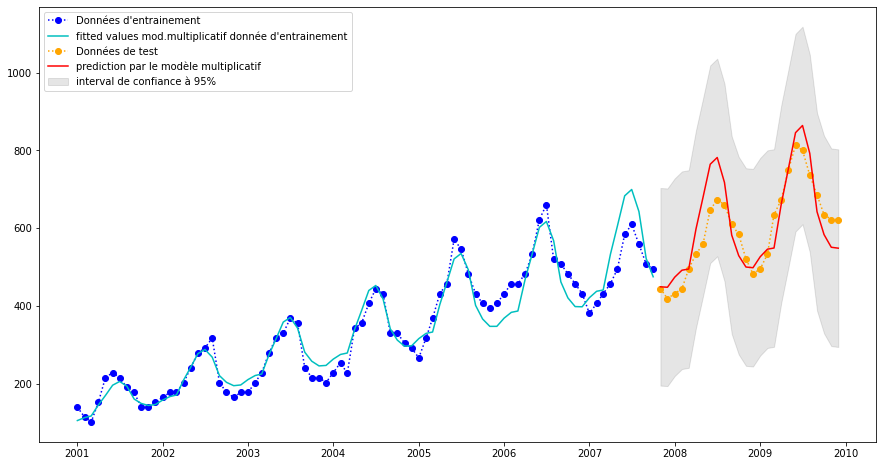

In [ ]:
plt.figure(figsize=(15, 8))
# affichage de la base d'entainement
plt.plot(df_train2["Years"], df_train2["Sales"], "o:", color="blue")
plt.plot(df_train2["Years"], df_train2["multiplicatif_model_prediction"], color="c")

# affichage des données de la base de test
plt.plot(df_test2["Years"], df_test2["Sales"], "o:", color="orange")
plt.plot(df_test2["Years"], df_test2["multiplicatif_model_prediction"], color="red")

marge_max_mul = df_test2["multiplicatif_model_prediction"] + interval_mul
marge_min_mul = df_test2["multiplicatif_model_prediction"] - interval_mul
plt.fill_between(df_test2["Years"], marge_max_mul, marge_min_mul, alpha=0.1, color="black")

plt.legend(["Données d'entrainement", "fitted values mod.multiplicatif donnée d'entrainement", "Données de test", "prediction par le modèle multiplicatif", "interval de confiance à 95%"], loc="upper left")

##Autocorrélation + stationnarisation 

In [ ]:
df_train3 = df_train.copy()
df_test3 = df_test.copy()

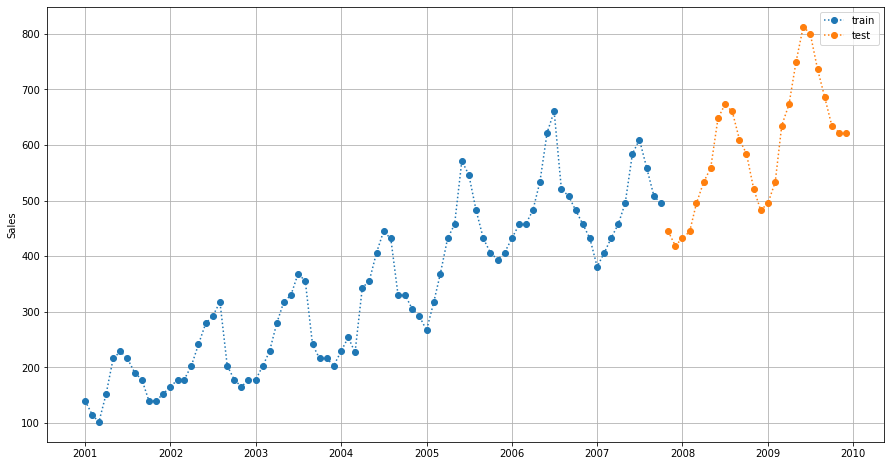

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df_train3["Years"], df_train3["Sales"], "o:")
plt.plot(df_test3["Years"], df_test3["Sales"], "o:")
plt.legend(["train", "test"])
plt.ylabel("Sales")
plt.grid()
plt.show()

In [ ]:
!pip3 install --upgrade statsmodels

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 0, 'Lags')

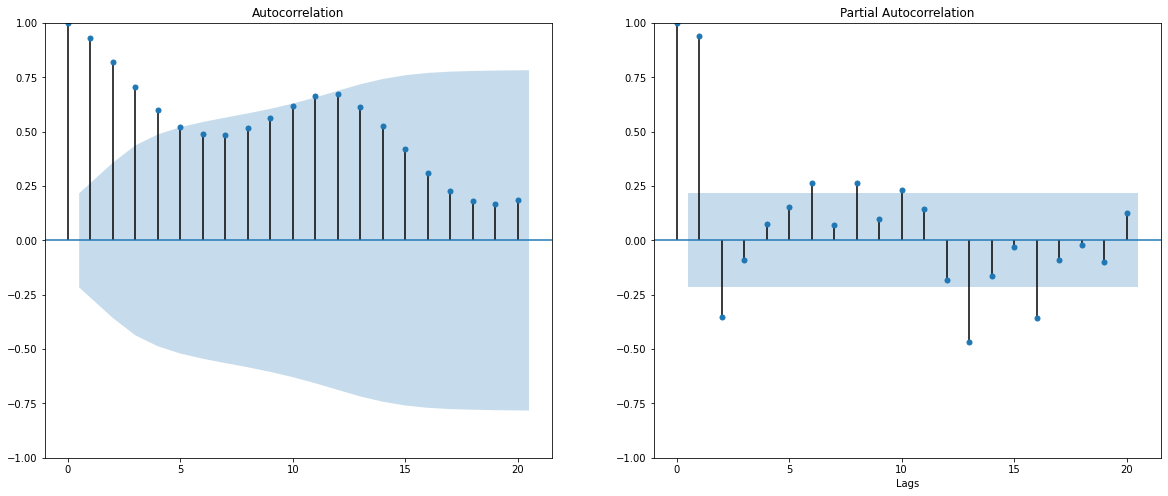

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
autocor = plot_acf(df_train3["Sales"], ax=ax[0])
plt.xlabel("Lags")
partial_autocor = plot_pacf(df_train3["Sales"], ax=ax[1])
plt.xlabel("Lags")

In [ ]:
difference = df_train3["Sales"].diff()

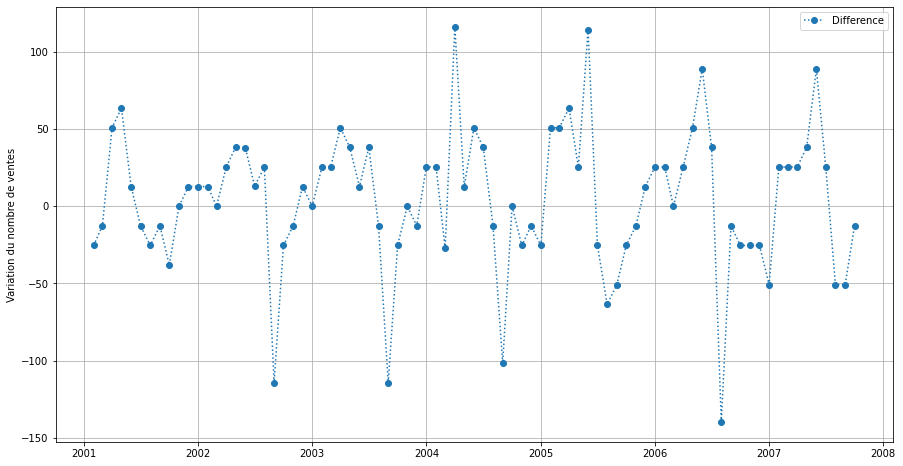

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df_train3["Years"], difference, "o:")
plt.legend(["Difference"])
plt.ylabel("Variation du nombre de ventes")
plt.grid()
plt.show()

In [ ]:
difference.dropna(inplace=True)

Text(0.5, 0, 'Lags')

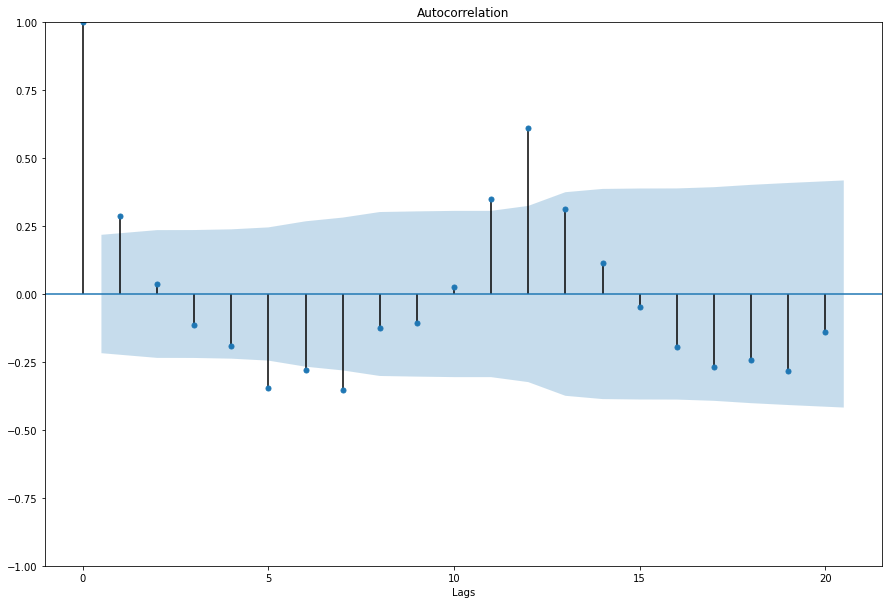

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
autocor = plot_acf(difference, ax=ax)
plt.xlabel("Lags")


## Auto Regressif
On le AR(p)

avec p = number of lags (taille du cycle)

Dans notre exemple : p = 12 (mois)

Le modèle que l'on va construire est AR(12)

Sa prédiction pour un instant t dépend des 12 valeurs précedentes

In [ ]:
x_train = df_train3.set_index("Years")
x_test = df_test3.set_index("Years")

x_train.drop(columns=["time"], inplace=True)
x_test.drop(columns=["time"], inplace=True)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model_ar = AutoReg(x_train, lags=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fitted_values = model_ar.fittedvalues

In [ ]:
import datetime

In [ ]:
start = datetime.datetime.strptime("2007-11-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2009-12-01", "%Y-%m-%d")

In [ ]:
prediction_test = model_ar.predict(start, end)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [ ]:
error = model_ar.resid
std_error = error.std()
interval_ar = 4.4*std_error

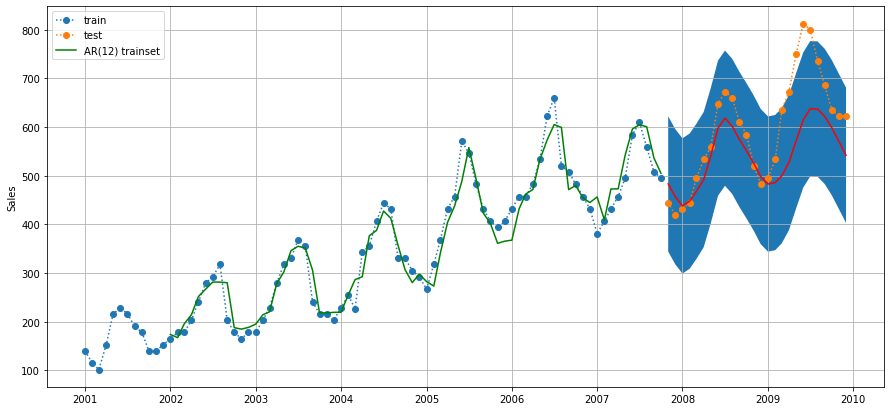

In [ ]:
plt.figure(figsize=(15, 7))
# vérité terrain
plt.plot(df_train3["Years"], df_train3["Sales"], "o:")
plt.plot(df_test3["Years"], df_test3["Sales"], "o:")
# prédiction du modèle
plt.plot(fitted_values, "g-")
plt.plot(prediction_test, "r-")
# intervalle de confiance
plt.fill_between(df_test3["Years"], prediction_test.values + interval_ar, prediction_test.values - interval_ar)

plt.legend(["train", "test", "AR(12) trainset"])
plt.ylabel("Sales")
plt.grid()
plt.show()